# Classification

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import re

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style

## import model objects
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix

## Read file

In [2]:
df = pd.read_csv('../Data/dataset_others_class.csv')

In [3]:
df = df.rename(columns={'F_Close_pred_class':'Prediction'})

In [4]:
df

,Date,CADUSD=X_Open,CADUSD=X_Close,CADUSD=X_High,CADUSD=X_Low,CADUSD=X_Volume,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,...,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_Bollinger_Lower,Prediction
0,2019-11-26 00:00:00+00:00,0.751665,0.751705,0.752842,0.750999,0.0,-0.000418,0.000000,0.000418,0.000289,...,62.087549,73.913071,-26.086929,0.006892,0.002249,-0.331855,2.394865e+06,9.188927,8.586074,1
1,2019-11-27 00:00:00+00:00,0.753597,0.753636,0.754205,0.752502,0.0,0.001932,0.001932,0.000000,0.000427,...,67.610216,89.583482,-10.416518,0.019164,0.005663,0.220269,2.768411e+06,9.183159,8.647842,0
2,2019-11-29 00:00:00+00:00,0.753125,0.753029,0.753211,0.751145,0.0,-0.000607,0.000000,0.000607,0.000427,...,62.910674,81.250149,-18.749851,0.025755,0.009711,0.221244,2.710846e+06,9.165730,8.712270,0
3,2019-12-02 00:00:00+00:00,0.752734,0.752791,0.753296,0.751569,0.0,-0.000238,0.000000,0.000238,0.000419,...,57.178300,70.833433,-29.166567,0.027163,0.013223,2.270145,2.505366e+06,9.172619,8.717381,0
4,2019-12-03 00:00:00+00:00,0.751552,0.751710,0.752899,0.750728,0.0,-0.001081,0.000000,0.001081,0.000419,...,45.657569,45.833433,-54.166567,0.019687,0.014522,1.137661,1.963927e+06,9.166840,8.712161,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,2024-10-22 00:00:00+00:00,0.722883,0.722883,0.723877,0.722684,0.0,-0.001776,0.000000,0.001776,0.000308,...,63.192190,91.764633,-8.235367,0.063288,0.007636,6.315788,6.779642e+07,11.195281,10.306719,0
1233,2024-10-23 00:00:00+00:00,0.723788,0.723788,0.723809,0.721433,0.0,0.000905,0.000905,0.000000,0.000245,...,59.825069,80.219848,-19.780152,0.071755,0.020460,4.635769,6.762839e+07,11.223237,10.297763,1
1234,2024-10-24 00:00:00+00:00,0.722716,0.722716,0.724008,0.721480,0.0,-0.001072,0.000000,0.001072,0.000245,...,67.105734,98.850548,-1.149452,0.091931,0.034754,7.149667,6.835647e+07,11.282170,10.320830,0
1235,2024-10-25 00:00:00+00:00,0.721850,0.721850,0.722648,0.720170,0.0,-0.000866,0.000000,0.000866,0.000245,...,56.038726,72.631549,-27.368451,0.093129,0.046429,4.237286,6.776479e+07,11.312438,10.329562,1


In [5]:
open_cols = [col for col in df.columns if '_Open' in col]
close_cols = [col for col in df.columns if '_Close' in col]
high_cols = [col for col in df.columns if '_High' in col]
low_cols = [col for col in df.columns if '_Low' in col]
vol_cols = [col for col in df.columns if '_Volume' in col]

In [6]:
close_cols

['CADUSD=X_Close',
 'GM_Close',
 'JCI_Close',
 'TM_Close',
 'TRYUSD=X_Close',
 '^IXIC_Close']

In [7]:
#df.rename(columns={'DNZOY_Close_pred_class':'Prediction'})

In [8]:
df = df.drop(columns=open_cols)
df = df.drop(columns=close_cols)
df = df.drop(columns=high_cols)
df = df.drop(columns=low_cols)
df = df.drop(columns=vol_cols)

df

,Date,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,CADUSD=X_Avg_Loss,CADUSD=X_SMA,CADUSD=X_EMA,CADUSD=X_change_in_price,CADUSD=X_RSI,...,F_change_in_price,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,Prediction
0,2019-11-26 00:00:00+00:00,-0.000418,0.000000,0.000418,0.000289,0.000910,0.756581,0.756180,-0.000418,27.821853,...,0.010000,62.087549,73.913071,-26.086929,0.006892,0.002249,-0.331855,2.394865e+06,9.188927,1
1,2019-11-27 00:00:00+00:00,0.001932,0.001932,0.000000,0.000427,0.000767,0.756063,0.755938,0.001932,42.880806,...,0.090000,67.610216,89.583482,-10.416518,0.019164,0.005663,0.220269,2.768411e+06,9.183159,0
2,2019-11-29 00:00:00+00:00,-0.000607,0.000000,0.000607,0.000427,0.000641,0.755736,0.755661,-0.000607,39.864127,...,-0.040000,62.910674,81.250149,-18.749851,0.025755,0.009711,0.221244,2.710846e+06,9.165730,0
3,2019-12-02 00:00:00+00:00,-0.000238,0.000000,0.000238,0.000419,0.000658,0.755404,0.755387,-0.000238,38.634678,...,-0.050000,57.178300,70.833433,-29.166567,0.027163,0.013223,2.270145,2.505366e+06,9.172619,0
4,2019-12-03 00:00:00+00:00,-0.001081,0.000000,0.001081,0.000419,0.000707,0.754937,0.755037,-0.001081,33.260985,...,-0.120000,45.657569,45.833433,-54.166567,0.019687,0.014522,1.137661,1.963927e+06,9.166840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,2024-10-22 00:00:00+00:00,-0.001776,0.000000,0.001776,0.000308,0.001477,0.733303,0.730472,-0.001776,22.129881,...,0.230000,63.192190,91.764633,-8.235367,0.063288,0.007636,6.315788,6.779642e+07,11.195281,0
1233,2024-10-23 00:00:00+00:00,0.000905,0.000905,0.000000,0.000245,0.001477,0.732536,0.729835,0.000905,28.290869,...,-0.049999,59.825069,80.219848,-19.780152,0.071755,0.020460,4.635769,6.762839e+07,11.223237,1
1234,2024-10-24 00:00:00+00:00,-0.001072,0.000000,0.001072,0.000245,0.001513,0.731416,0.729157,-0.001072,25.529720,...,0.179999,67.105734,98.850548,-1.149452,0.091931,0.034754,7.149667,6.835647e+07,11.282170,0
1235,2024-10-25 00:00:00+00:00,-0.000866,0.000000,0.000866,0.000245,0.001406,0.730423,0.728461,-0.000866,23.401396,...,-0.170000,56.038726,72.631549,-27.368451,0.093129,0.046429,4.237286,6.776479e+07,11.312438,1


In [9]:
#correlation = df.loc[:, df.columns != 'Date'].corr()
#plt.figure(figsize=(15,15))
#plt.title('Correlation Matrix')
#sns.heatmap(correlation, vmax=1, square=True,annot=True)

## CADUSD=X and F

In [27]:
F_cols = [col for col in df.columns if 'F_' in col]
CADUSD_cols = F_cols.copy()

for col in df.columns:
    if 'CADUSD=X' in col:
        CADUSD_cols.append(col)
        
CADUSD_cols.append('Prediction')
CADUSD_cols

['F_Change',
 'F_Gain',
 'F_Loss',
 'F_Avg_Gain',
 'F_Avg_Loss',
 'F_SMA',
 'F_EMA',
 'F_change_in_price',
 'F_RSI',
 'F_k_percent',
 'F_r_percent',
 'F_MACD',
 'F_MACD_EMA',
 'F_ROC',
 'F_PVT',
 'F_Bollinger_Upper',
 'CADUSD=X_Change',
 'CADUSD=X_Gain',
 'CADUSD=X_Loss',
 'CADUSD=X_Avg_Gain',
 'CADUSD=X_Avg_Loss',
 'CADUSD=X_SMA',
 'CADUSD=X_EMA',
 'CADUSD=X_change_in_price',
 'CADUSD=X_RSI',
 'CADUSD=X_k_percent',
 'CADUSD=X_r_percent',
 'CADUSD=X_MACD',
 'CADUSD=X_MACD_EMA',
 'CADUSD=X_ROC',
 'CADUSD=X_PVT',
 'CADUSD=X_Bollinger_Upper',
 'Prediction']

In [28]:
df_CADUSD = df[CADUSD_cols].copy()
df_CADUSD

,F_Change,F_Gain,F_Loss,F_Avg_Gain,F_Avg_Loss,F_SMA,F_EMA,F_change_in_price,F_RSI,F_k_percent,...,CADUSD=X_change_in_price,CADUSD=X_RSI,CADUSD=X_k_percent,CADUSD=X_r_percent,CADUSD=X_MACD,CADUSD=X_MACD_EMA,CADUSD=X_ROC,CADUSD=X_PVT,CADUSD=X_Bollinger_Upper,Prediction
0,0.010000,0.010000,0.000000,0.046429,0.040000,8.8875,8.851336,0.010000,62.087549,73.913071,...,-0.000418,27.821853,12.661161,-87.338839,-0.001154,-0.000859,-0.571288,0.0,0.763428,1
1,0.090000,0.090000,0.000000,0.052857,0.037857,8.9155,8.875019,0.090000,67.610216,89.583482,...,0.001932,42.880806,41.285261,-58.714739,-0.001081,-0.000904,-0.330094,0.0,0.762062,0
2,-0.040000,0.000000,0.040000,0.042143,0.040714,8.9390,8.892636,-0.040000,62.910674,81.250149,...,-0.000607,39.864127,33.284381,-66.715619,-0.001052,-0.000934,-0.359200,0.0,0.761643,0
3,-0.050000,0.000000,0.050000,0.039286,0.044286,8.9450,8.903813,-0.050000,57.178300,70.833433,...,-0.000238,38.634678,30.147798,-69.852202,-0.001033,-0.000954,-0.355312,0.0,0.761178,0
4,-0.120000,0.000000,0.120000,0.039286,0.050000,8.9395,8.902498,-0.120000,45.657569,45.833433,...,-0.001081,33.260985,15.907520,-84.092480,-0.001081,-0.000979,-0.384124,0.0,0.760288,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,0.230000,0.230000,0.000000,0.074286,0.048571,10.7510,10.840467,0.230000,63.192190,91.764633,...,-0.001776,22.129881,3.953370,-96.046630,-0.003527,-0.002304,-2.375397,0.0,0.748374,0
1233,-0.049999,0.000000,0.049999,0.074286,0.032857,10.7605,10.861375,-0.049999,59.825069,80.219848,...,0.000905,28.290869,12.411880,-87.588120,-0.003601,-0.002564,-1.939757,0.0,0.747917,1
1234,0.179999,0.179999,0.000000,0.087143,0.030714,10.8015,10.897435,0.179999,67.105734,98.850548,...,-0.001072,25.529720,7.588977,-92.411023,-0.003704,-0.002792,-1.580583,0.0,0.746194,0
1235,-0.170000,0.000000,0.170000,0.078571,0.042857,10.8210,10.913869,-0.170000,56.038726,72.631549,...,-0.000866,23.401396,11.514332,-88.485668,-0.003811,-0.002996,-1.453081,0.0,0.744954,1


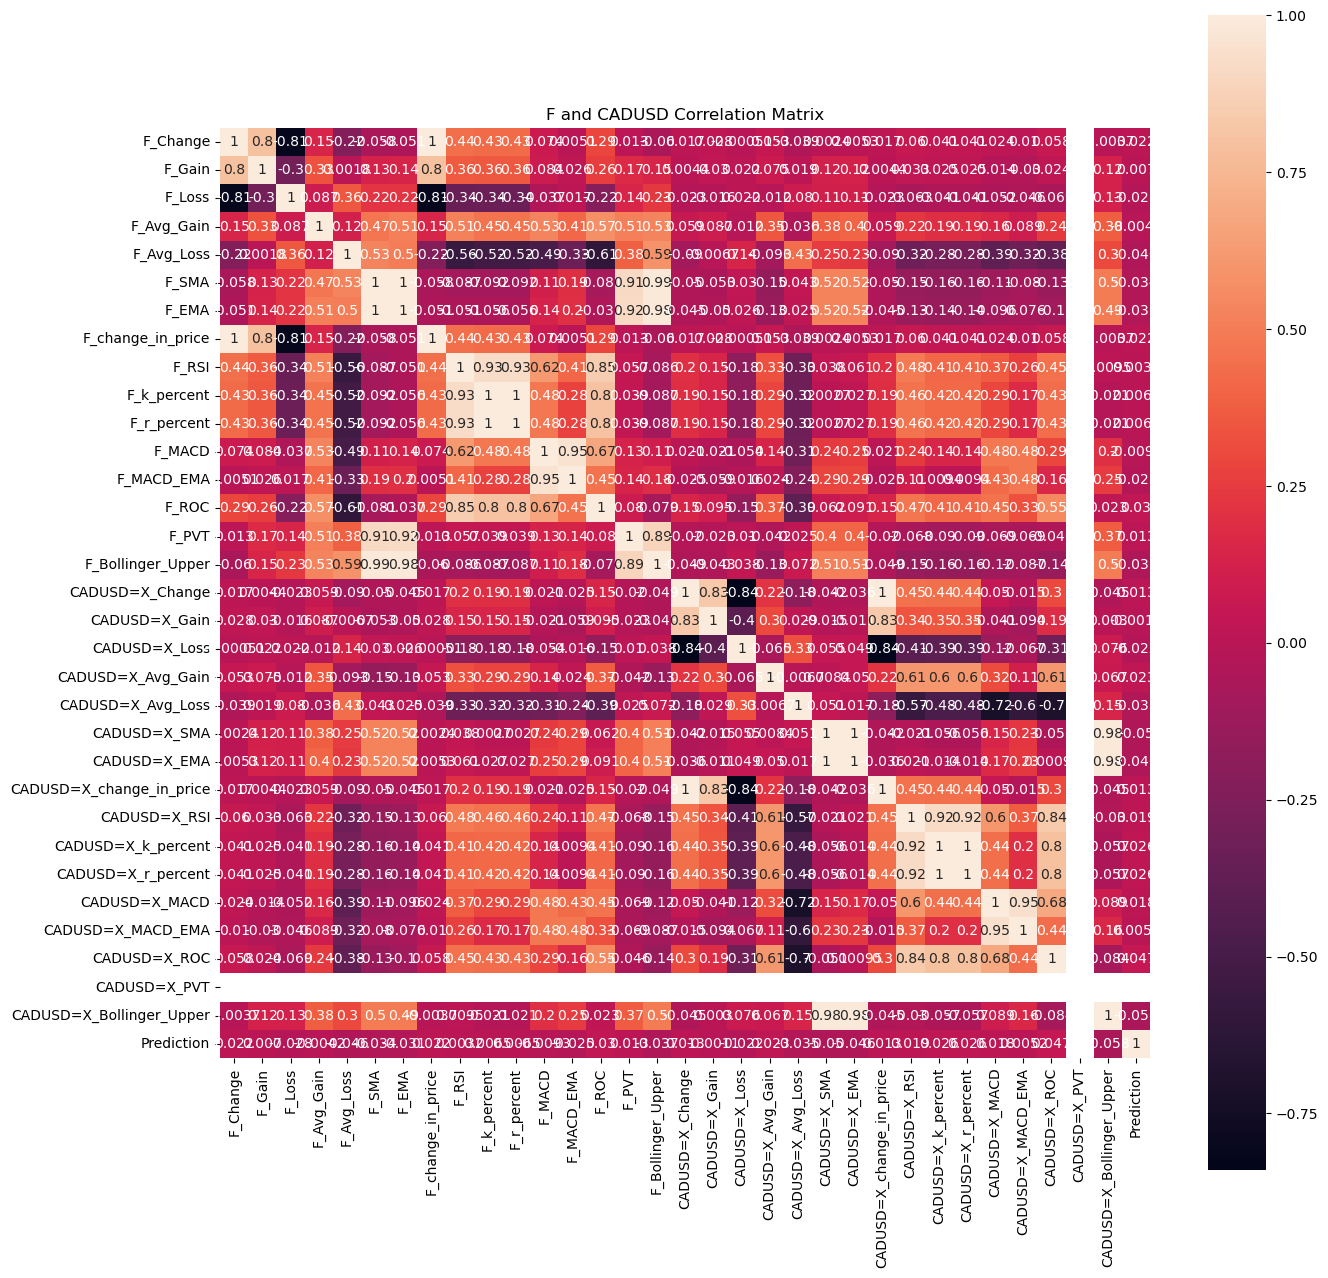

In [30]:
correlation_CADUSD = df_CADUSD.corr()
plt.figure(figsize=(15,15))
plt.title('F and CADUSD Correlation Matrix')
sns.heatmap(correlation_CADUSD, vmax=1, square=True, annot=True)
plt.show()

## Classification models

In [10]:
tree = DecisionTreeClassifier(
    #max_depth = 10, 
    min_samples_leaf = 5, # minimum number of samples in each leaf, to prevent overfitting
    random_state= 216)

rf = RandomForestClassifier(
    n_estimators = 500, # number of trees in ensemble
    #max_depth = 10, # max_depth of each tree
    min_samples_leaf = 5, 
    max_features = 2, # default is round(sqrt(num_features)), which in this case is 1.
    bootstrap= True, # sampling with replacement
    max_samples = 500, # number of training samples selected with replacement to build tree
    random_state = 216 # for consistency
    )

rand_first_clf = RandomForestClassifier(n_estimators = 100, oob_score = True, criterion = "gini", random_state = 0)

In [11]:
Y = df['Prediction']
X = df.loc[:, (df.columns != 'Date') & (df.columns != 'Prediction')]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

In [13]:
## Fit the models
tree.fit(X_train, Y_train)
print(accuracy_score(Y_test, tree.predict(X_test)))

## rf and et may take slightly longer because we are fitting many trees
rf.fit(X_train, Y_train)
print(accuracy_score(Y_test, rf.predict(X_test)))

rand_first_clf.fit(X_train, Y_train)
print(accuracy_score(Y_test, rand_first_clf.predict(X_test)))

0.5161290322580645
0.5040322580645161
0.5483870967741935


In [15]:
## Confusion_matrix
print('Decision Tree')
print(confusion_matrix(Y_test, tree.predict(X_test)))
print('---------------------')
print('Random Forest 1')
print(confusion_matrix(Y_test, rf.predict(X_test)))
print('---------------------')
print('Random Forest 2')
print(confusion_matrix(Y_test, rand_first_clf.predict(X_test)))

Decision Tree
[[72 53]
 [67 56]]
---------------------
Random Forest 1
[[61 64]
 [59 64]]
---------------------
Random Forest 2
[[72 53]
 [59 64]]
